In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab 
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab

In [172]:
Rj=69911.0 #km
Rnep=49528/2 #km
Re=6371.0 #km
Rsun=695700.0 #km
au=149597870.7 #km

In [4]:
def phi(beta):
    lambert_phi=(np.sin(beta)+(np.pi-beta)*np.cos(beta))/np.pi
    return lambert_phi

In [5]:
def cspref(beta,A,Rp,a):
    return 2.0*phi(beta)/3.0*A*(Rp/a)**2

In [6]:
def cspemi(Tp,Ts,Rp,Rs,lambmic):
    lamb=(lambmic)*u.micron
    lamb5=(lamb.to(u.m))**5    
    facs=(const.h*const.c/(lamb.to(u.m)*const.k_B*Ts*u.K)).value
    facs=np.exp(facs)-1.0
    facp=(const.h*const.c/(lamb.to(u.m)*const.k_B*Tp*u.K)).value
    facp=np.exp(facp)-1.0
    return Rp**2/Rs**2*facs/facp


In [7]:
#radiative equilibrium temperature
def Teq(Rs,Ts,aau,A,betafac=1):
    fac1=((1.0-A)/(4*betafac))**0.25
    fac2=(Ts/5800.0)
    fac3=np.sqrt(Rs/Rsun)
    fac4=np.sqrt(aau)
    T=396*fac1*fac2*fac3/fac4
    return T

In [8]:
#Teq(0.3*Rsun,3500,0.1,0.3)
Teq(Rsun,5800,1.0,0.3)

256.1266080681267

In [9]:
#(4.106)
cspref(np.pi/2,0.3,Re,1*au)

1.1546344445595194e-10

In [10]:
#(4.112) lambda-> infinity 
cspemi(293,5778,Re,Rsun,1000000000.0)

4.2526661946119906e-06

In [11]:
def cmodel(lambmic,Rssun,Ts,aau,A,Rp,beta=np.pi/2,betafac=1.0):
    Tp=Teq(Rssun*Rsun,Ts,aau,A,beta)
    c=cspref(beta,A,Rp,aau*au)+cspemi(Tp,Ts,Rp,Rssun*Rsun,lambmic)
    #print()
    return c

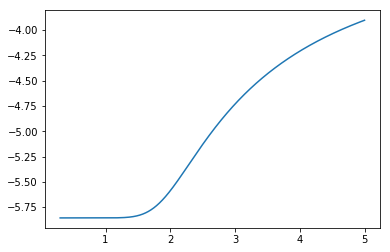

In [62]:
fig=plt.figure()
#lam=np.logspace(0.1,2,1000)
lam=np.arange(0.3, 5.0, 0.001)
plt.plot(lam,np.log10(cmodel(lam,1.0,5800,0.1,0.3,Rj)))
#plt.yscale("log")
#plt.yscale("log")
plt.show()

In [63]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'



In [70]:
np.linspace(-10,-3,15)

array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ])

In [149]:
def getau(angle,lammic,dtelm,dpc):
    #angle: angle in unit of l/d
    #lammic lambda in micron
    #dtelm D of telescope in m
    #dpc distance in pc
    ld=lammic*1.e-6/dtelm/np.pi*180.0*3600
    aau=angle*ld*dpc
    return aau

In [129]:
def iwamas(aau,lammic,dtelm,dpc=10.0):
    ld=lammic*1.e-6/dtelm/np.pi*180.0*3600
    sec=aau/dpc 
    return sec/ld
    

In [142]:
getau(1,1.0,30.0,10.0)

0.0687549354156988

In [176]:
def plotall(Ts=5800,Rssun=1.0,A=0.3,Rp=Rj,file="G_jup.png",rpstr="Jupiter",dpc=10):
    delta = 0.001
    x = np.arange(0.001, 5.0, 0.01) #au
    y = np.arange(0.3, 5.0, 0.001)  #micron
    X, Y = np.meshgrid(x, y)
    Z = np.log10(cmodel(Y,Rssun,Ts,X,A,Rp))
    
    fig=plt.figure()
    ax=fig.add_subplot(111)
    
    CS = plt.contourf(Y,X,Z, levels=np.linspace(-10,-3,15),cmap="CMRmap",alpha=0.7)
    cc=plt.colorbar()
    cc.set_label("$\log_{10}$ contrast")
    CS1 = plt.contour(Y,X,Z, levels=np.linspace(-10,-3,15),colors="black",linewidths = 0.1)
    plt.clabel(CS1, fontsize=9, inline=1)
    #CS = plt.contourf(Y,X,Z, levels=[-10,-9,-8,-7,-6])
    ax.plot(y,getau(1,y,30.0,dpc),c="k",ls="dotted",label="$1 \lambda/D @ "+str(dpc)+"pc$")
    ax.plot(y,getau(3,y,30.0,dpc),c="k",ls="dashed",label="$3 \lambda/D @ "+str(dpc)+"pc$")
    ax.legend()
    plt.xlim(0.6,5.0)
    plt.ylim(0.05,3.0)
    
    plt.yscale("log")
    plt.xscale("log")
    plt.title('Rs='+str(Rssun)+" $R_\odot$, Ts="+str(Ts)+"K, "+rpstr+" A="+str(A))
    plt.xlabel("wavelength (micron)")
    plt.ylabel("au")
    ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
    ax.xaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
    
    plt.savefig(file, bbox_inches="tight", pad_inches=0.0)
    plt.show()

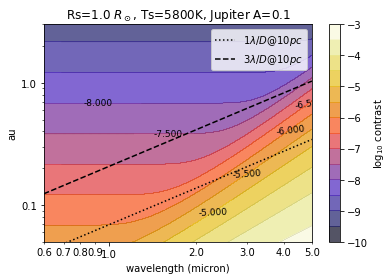

In [177]:
plotall(Ts=5800,Rssun=1.0,A=0.1,Rp=Rj,file="G_jup.png",rpstr="Jupiter")

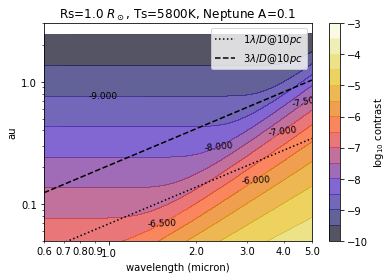

In [173]:
plotall(Ts=5800,Rssun=1.0,A=0.1,Rp=Rnep,file="G_nep.png",rpstr="Neptune")

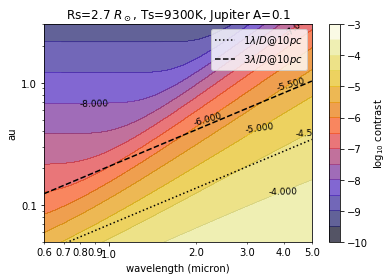

In [174]:
plotall(Ts=9300,Rssun=2.7,A=0.1,Rp=Rj,file="A_jup.png",rpstr="Jupiter")

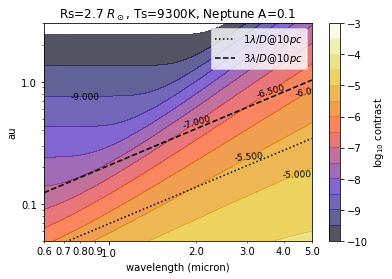

In [175]:
plotall(Ts=9300,Rssun=2.7,A=0.1,Rp=Rnep,file="A_nep.png",rpstr="Neptune")

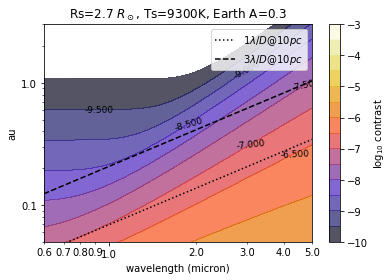

In [184]:
plotall(Ts=9300,Rssun=2.7,A=0.3,Rp=Re,file="A_earth.png",rpstr="Earth")

/home/kawahara/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in exp


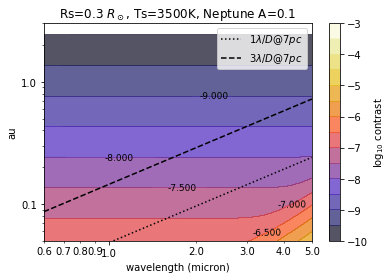

In [181]:
plotall(Ts=3500,Rssun=0.3,A=0.1,Rp=Rnep,file="M_nep.png",rpstr="Neptune",dpc=7)

/home/kawahara/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in exp


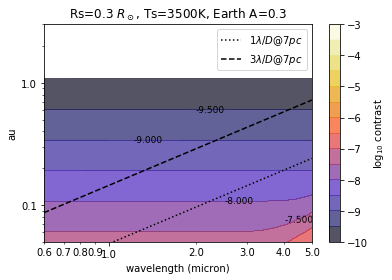

In [183]:
plotall(Ts=3500,Rssun=0.3,A=0.3,Rp=Re,file="M_earth.png",rpstr="Earth",dpc=7)

In [10]:
contrast=np.array([0.008,0.0025,0.004,0.004,0.01,3e-5,2.5e-5,2.5e-5,1.e-5,1.6e-5,1.5e-5])
angsep=np.array([0.11,0.16,0.16,0.25,0.2,0.37,0.69,1.09,1.73,0.48,0.48])
#name=[]

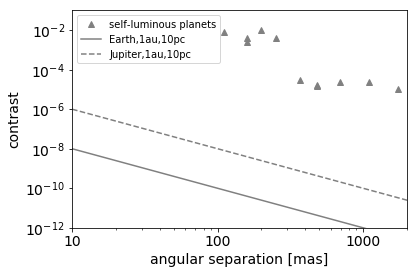

In [42]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(angsep*1000,contrast,"^",color="gray",label="self-luminous planets")
plt.xscale("log")
plt.yscale("log")
xa=[10,10000]
cc1=[1.e-8,1.e-14]
cc2=[1.e-6,1.e-12]
ax.plot(xa,cc1,color="gray",label="Earth,1au,10pc")
ax.plot(xa,cc2,color="gray",ls="dashed",label="Jupiter,1au,10pc")
plt.ylim(1.e-12,1.e-1)
plt.xlim(10,2000)
plt.tick_params(labelsize=14)
plt.ylabel("contrast",fontsize=14)
plt.xlabel("angular separation [mas]",fontsize=14)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.legend()
plt.savefig("directimage.pdf", bbox_inches="tight", pad_inches=0.0)
plt.show()